In [1]:
import pandas as pd
import numpy as np
import os
import sys
import datetime
import time
import math 

import matplotlib.pyplot as plt


In [2]:
dir_data = '../data/CrossSection/'
dir_in = '../data/ARIA/'
dir_out = '../figures/CrossSection/'
fns = {'O3': 'o3_298k_s9.txt',
      'NO2':'no2_298k_s6.txt',
      'NO3':'no3_298k_s8.txt',
      'HONO':'hono_s1.txt',
      'HNO3':'hno3_298k_s5.txt'}

<ipython-input-5-306c0511222f>:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df1 = pd.read_csv(fn, names = cols, sep='[\s]{2,}')
<ipython-input-5-306c0511222f>:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df1 = pd.read_csv(fn, names = cols, sep='[\s]{2,}')
<ipython-input-5-306c0511222f>:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df1 = pd.read_csv(fn, names = cols, sep='[\s]{2,}')
<ipython-input-5-30

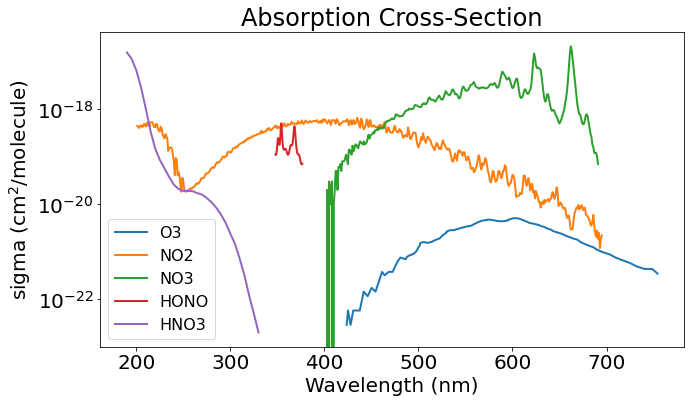

In [5]:
plt.rcParams["figure.figsize"] = (10, 6) # (w, h)
plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots()

for key in fns:
    fn = dir_data + fns[key]
    cols = ['wavelength', key]
    df1 = pd.read_csv(fn, names = cols, sep='[\s]{2,}')
    if key == 'HONO':
        df1[cols[1]] = df1[cols[1]]/10**19
    
    plt.plot(df1[cols[0]],df1[key], lw=2,label = key)
    plt.grid()


plt.title('Absorption Cross-Section')
plt.xlabel('Wavelength (nm)')
plt.ylabel('sigma (cm$^2$/molecule)')
plt.yscale('log')
plt.legend( loc='lower left', frameon = True, fontsize=16)
plt.grid()
plt.tight_layout()
ax = plt.gca()
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')

if not os.path.exists(dir_out):
    os.mkdir(dir_out)
plt.savefig(dir_out +'/CrossSection.png')


In [6]:
dir_in = '../data/ARIA/'


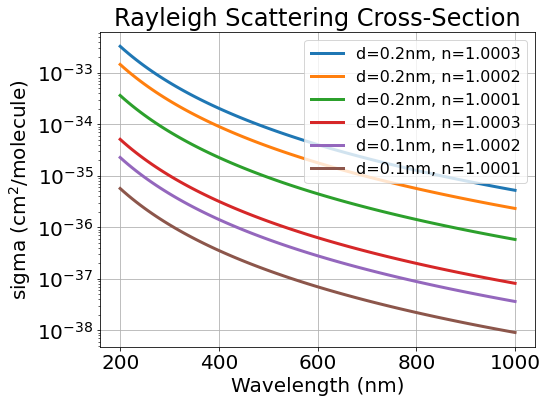

In [21]:
# Rayleigh

def sigmaRayleigh(d, n, lam):
    return (2*np.pi**5/3)*(d**6/lam**4)*((n**2-1)/(n**2+2))**2      /10**14 # from nm^2 to cm^2

wavelengths = np.linspace(200, 1000, num=100)

plt.rcParams["figure.figsize"] = (8, 6) # (w, h)
plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots()
for d in [0.1,0.2][::-1]: # in nm
    for n in [1.0001,1.0002, 1.0003][::-1]:
        sigmas = [sigmaRayleigh(d,n,wavelength) for wavelength in wavelengths]
        plt.plot(wavelengths, sigmas, lw=3,label = 'd='+str(d)+'nm, n='+str(n))
        plt.grid()
plt.title('Rayleigh Scattering Cross-Section')
plt.xlabel('Wavelength (nm)')
plt.ylabel('sigma (cm$^2$/molecule)')
plt.yscale('log')
plt.legend( loc='upper right', frameon = True, fontsize=16)
plt.grid()
plt.tight_layout()
ax = plt.gca()
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
plt.savefig(dir_out +'/CrossSectionRayleigh.png')


In [8]:
sigmas

[5.6668422750728513e-36,
 5.028995146203253e-36,
 4.478418830618356e-36,
 4.0011688729427867e-36,
 3.585832411247844e-36,
 3.2230162721744145e-36,
 2.904948627475985e-36,
 2.6251668975377616e-36,
 2.378271643531307e-36,
 2.159731303346043e-36,
 1.965726363627678e-36,
 1.7930243135972686e-36,
 1.6388787703573645e-36,
 1.5009476938906097e-36,
 1.3772267608674968e-36,
 1.2659948387045538e-36,
 1.1657691666540906e-36,
 1.0752683612314676e-36,
 9.933817572747163e-37,
 9.191439016623238e-37,
 8.517132552117757e-37,
 7.903543452726492e-37,
 7.3442275884944115e-37,
 6.833524826993341e-37,
 6.366451895653166e-37,
 5.93861143740666e-37,
 5.546114585260497e-37,
 5.185514859333852e-37,
 4.853751576156819e-37,
 4.5481012733445374e-37,
 4.2661359078440365e-37,
 4.005686794338626e-37,
 3.764813421208876e-37,
 3.541776421920532e-37,
 3.3350140955913425e-37,
 3.143121966377033e-37,
 2.96483495089503e-37,
 2.7990117691364723e-37,
 2.644621289593817e-37,
 2.5007305455892417e-37,
 2.366494198600776e-37,
 

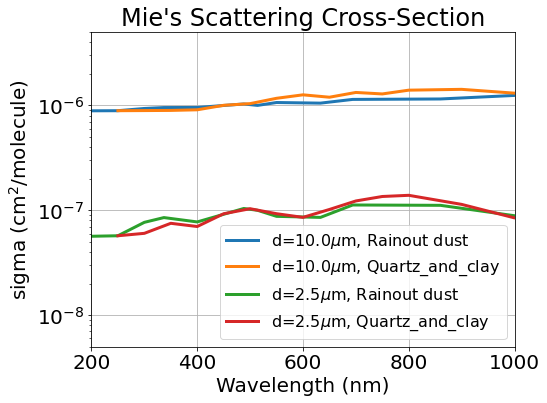

In [22]:
import PyMieScatt as ps
def sigmaMie(d, n, k, lam):
    return ps.MieQ(m = complex(n, k),
                   diameter = d,
                   nMedium = 1.0,
                   wavelength = lam,
                   asCrossSection = True)[1] /10**14 # from nm^2 to cm^2

plt.rcParams["figure.figsize"] = (8, 6) # (w, h)
plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots()

labels = ['Rainout dust',
          'Quartz_and_clay']
fns = ['Rainout_dust_(Volz_1972)/dust_volz_1972.ri',
      'Quartz_and_clay_(Koepke_et_al._1997)/sand_koepke_1997.ri']


for d in [2.5,10.0][::-1]:
    for i in range(len(fns)):
        fn = '../data/Mie/'+ fns[i]
        label = labels[i]
        df = pd.read_csv(fn, names = ['Wavelength','N','K'], index_col = None, delimiter=r"\s+")

        wavelengths = []
        sigmas = []
        
        for j in range(len(df)):
            lam, n, k = df[['Wavelength','N','K']].values[j]
            lam *= 1000 # μm to nm
            wavelengths.append(lam)
            sigmas.append(sigmaMie(d = d*1000, n=n, k=k, lam=lam))
            if lam > 2000:
                break

        if len(wavelengths):
            plt.plot(wavelengths, sigmas, lw=3,label = 'd='+str(d)+'$\mu$m, '+ label)
            plt.grid()

plt.xlim(200, 1000)
plt.ylim(5E-9,5E-6)
plt.title('Mie\'s Scattering Cross-Section')
plt.xlabel('Wavelength (nm)')
plt.ylabel('sigma (cm$^2$/molecule)')
plt.yscale('log')
plt.legend( loc='lower right', frameon = True, fontsize=16)
plt.grid()
plt.tight_layout()
ax = plt.gca()
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
plt.savefig(dir_out +'/CrossSectionMie.png')

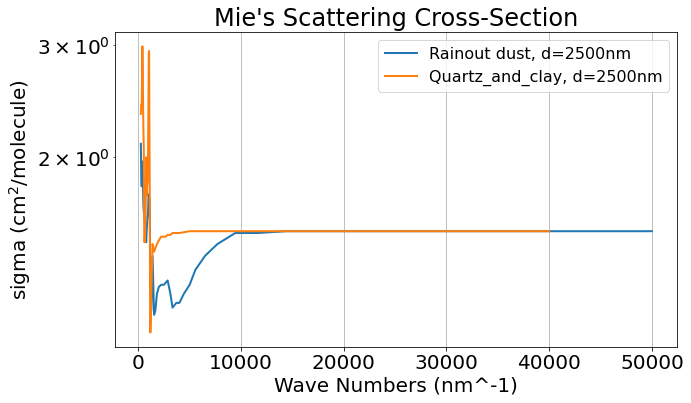

In [11]:
import PyMieScatt as ps
def sigmaMie(d, n, k, lam):
    return ps.MieQ(m = complex(n, k),
                   diameter = d,
                   nMedium = 1.0,
                   wavelength = lam,
                   asCrossSection = True)[1] /10**14 # from nm^2 to cm^2


plt.rcParams["figure.figsize"] = (10, 6) # (w, h)
plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots()

d = 2500
for i in range(len(fns)):
    fn = '../data/Mie/'+ fns[i]
    label = labels[i]
    df = pd.read_csv(fn, names = ['Wavelength','N','K'], index_col = None, delimiter=r"\s+")    
    
    wavenums = []
    ns = []
    for j in range(len(df)):
        lam, n, k = df[['Wavelength','N','K']].values[j]
        lam /= 10000 # μm to cm
        wavenums.append(1.0/lam)
        ns.append(n)
    
    plt.plot(wavenums, ns, lw=2,label = label + ', d='+str(d)+'nm')
    plt.grid()

# plt.xlim(0,800)
plt.title('Mie\'s Scattering Cross-Section')
plt.xlabel('Wave Numbers (nm^-1)')
plt.ylabel('sigma (cm$^2$/molecule)')
plt.yscale('log')
plt.legend( loc='upper right', frameon = True, fontsize=16)
plt.tight_layout()
plt.grid()
ax = plt.gca()
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
